In [3]:
#!/bin/bash
!curl -L -o laptop-prices-dataset.zip https://www.kaggle.com/api/v1/datasets/download/anubhavgoyal10/laptop-prices-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  9300  100  9300    0     0  11337      0 --:--:-- --:--:-- --:--:-- 11337


In [4]:
!unzip laptop-prices-dataset.zip

Archive:  laptop-prices-dataset.zip
  inflating: laptopPrice.csv         


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/content/laptopPrice.csv')
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [8]:
df.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


In [9]:
df.isnull().sum()

,0
brand,0
processor_brand,0
processor_name,0
processor_gnrtn,0
ram_gb,0
ram_type,0
ssd,0
hdd,0
os,0
os_bit,0


In [10]:
df['ssd'] = df['ssd'].str.extract(r'(\d+)').astype(int)
df['hdd'] = df['hdd'].str.extract(r'(\d+)').astype(int)

In [11]:
df1 = df

In [13]:
df1.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

In [14]:
X = df1.drop('Price', axis =1)
y = df1['Price'].copy()

In [16]:
df1.index

RangeIndex(start=0, stop=823, step=1)

In [17]:
df1.dtypes

,0
brand,object
processor_brand,object
processor_name,object
processor_gnrtn,object
ram_gb,object
ram_type,object
ssd,int64
hdd,int64
os,object
os_bit,object


In [21]:
df.sort_values('Price')

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
194,Lenovo,Intel,Celeron Dual,Not Available,4 GB,LPDDR4,0,512,Windows,32-bit,0 GB,Casual,No warranty,No,No,16990,3 stars,414,54
12,Avita,Intel,Celeron Dual,Not Available,4 GB,DDR4,0,512,Windows,64-bit,0 GB,Casual,No warranty,No,No,17490,3 stars,1120,196
189,ASUS,Intel,Celeron Dual,Not Available,4 GB,LPDDR4,0,512,Windows,32-bit,0 GB,Casual,No warranty,No,No,17990,3 stars,1180,148
188,ASUS,Intel,Celeron Dual,Not Available,4 GB,LPDDR4,0,512,Windows,64-bit,0 GB,Casual,No warranty,No,No,18990,3 stars,197,25
170,ASUS,Intel,Celeron Dual,Not Available,4 GB,LPDDR4,0,512,Windows,32-bit,0 GB,Casual,No warranty,No,No,20490,3 stars,637,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,MSI,Intel,Core i7,12th,16 GB,DDR5,1024,0,Windows,64-bit,8 GB,Casual,No warranty,No,No,279990,3 stars,0,0
433,MSI,Intel,Core i5,10th,8 GB,LPDDR4,0,512,DOS,32-bit,6 GB,Casual,No warranty,No,No,291190,4 stars,7,3
590,ASUS,Intel,Core i9,12th,16 GB,DDR5,1024,0,Windows,64-bit,6 GB,Casual,No warranty,No,No,299990,3 stars,0,0
621,APPLE,M1,M1,10th,32 GB,DDR4,1024,0,Mac,64-bit,0 GB,Casual,1 year,No,No,309990,5 stars,3,1


In [24]:
df.drop(['Number of Ratings', 'Number of Reviews'], axis=1, inplace=True)

In [26]:
df.dropna

<bound method DataFrame.dropna of       brand processor_brand processor_name processor_gnrtn ram_gb ram_type  \
0      ASUS           Intel        Core i3            10th   4 GB     DDR4   
1    Lenovo           Intel        Core i3            10th   4 GB     DDR4   
2    Lenovo           Intel        Core i3            10th   4 GB     DDR4   
3      ASUS           Intel        Core i5            10th   8 GB     DDR4   
4      ASUS           Intel   Celeron Dual   Not Available   4 GB     DDR4   
..      ...             ...            ...             ...    ...      ...   
818    ASUS             AMD        Ryzen 9   Not Available   4 GB     DDR4   
819    ASUS             AMD        Ryzen 9   Not Available   4 GB     DDR4   
820    ASUS             AMD        Ryzen 9   Not Available   4 GB     DDR4   
821    ASUS             AMD        Ryzen 9   Not Available   4 GB     DDR4   
822  Lenovo             AMD        Ryzen 5            10th   8 GB     DDR4   

      ssd   hdd       os  os_bit graphic_card_gb      weight     warranty  \
0       0  1024  Windows  64-bit            0 GB      Casual  No warranty   
1       0  1024  Windows  64-bit            0 GB      Casual  No warranty   
2       0  1024  Windows  64-bit            0 GB      Casual  No warranty   
3     512     0  Windows  32-bit            2 GB      Casual  No warranty   
4       0   512  Windows  64-bit            0 GB      Casual  No warranty   
..    ...   ...      ...     ...             ...         ...          ...   
818  1024     0  Windows  64-bit            0 GB      Casual       1 year   
819  1024     0  Windows  64-bit            0 GB      Casual       1 year   
820  1024     0  Windows  64-bit            4 GB      Casual       1 year   
821  1024     0  Windows  64-bit            4 GB      Casual       1 year   
822   512     0      DOS  64-bit            0 GB  ThinNlight  No warranty   

    Touchscreen msoffice   Price   rating  
0            No       No   34649  2 stars  
1            No       No   38999  3 stars  
2            No       No   39999  3 stars  
3            No       No   69990  3 stars  
4            No       No   26990  3 stars  
..          ...      ...     ...      ...  
818          No       No  135990  3 stars  
819          No       No  144990  3 stars  
820          No       No  149990  3 stars  
821          No       No  142990  3 stars  
822          No       No   57490  4 stars  

[823 rows x 17 columns]>

array([[<Axes: title={'center': 'ssd'}>, <Axes: title={'center': 'hdd'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

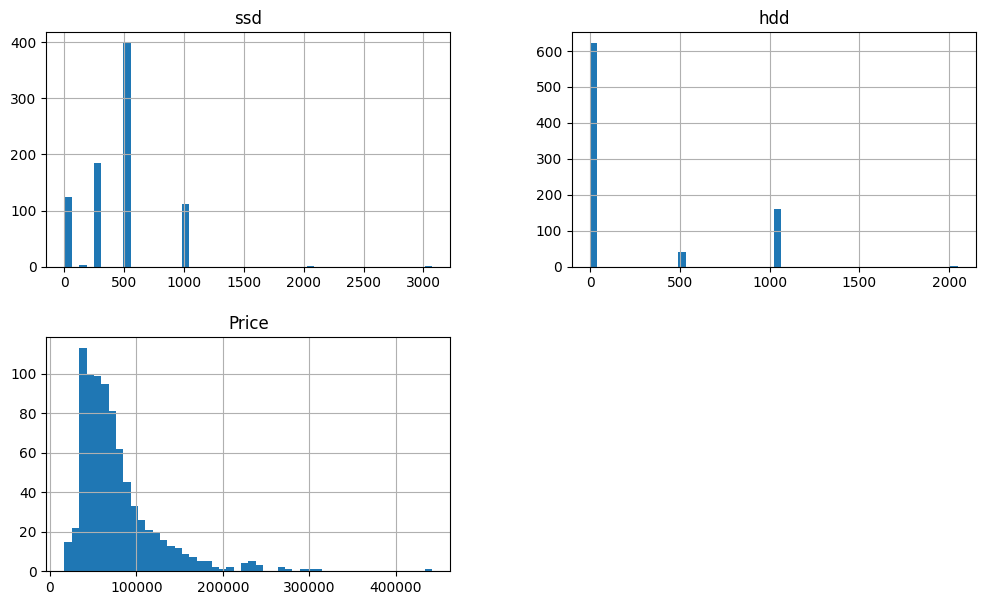

In [28]:
df.hist(figsize = (12, 7), bins=50)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [ ]:
num_features = X_train.select_dtypes(include=[np.number]).columns
cat_features = X_train.select_dtypes(exclude=[np.number]).columns

In [ ]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


transformer = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])


model = LinearRegression()
full_pipeline = Pipeline([
    ('preprocessing', transformer),
    ('estimator', model)
])

full_pipeline.fit(X_train, y_train)
y_pred = full_pipeline.predict(X_test)

In [ ]:
transformer.fit(X_train, y_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['ssd', 'hdd', 'Number of Ratings', 'Number of Reviews'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'os', 'os_bit', 'graphic_card_gb', 'weight',
       'warranty', 'Touchscreen', 'msoffice', 'rating'],
      dtype='object'))])

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X_train_transformer_df = pd.DataFrame(data=transformer.transform(X_train), columns=transformer.get_feature_names_out())
X_test_transformer_df = pd.DataFrame(data=transformer.transform(X_test), columns=transformer.get_feature_names_out())

In [ ]:
lr = LinearRegression()
lr.fit(X_train_transformer_df, y_train)

y_pred = lr.predict(X_test_transformer_df)

In [ ]:
y_pred = lr.predict(X_test_transformer_df)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train_transformer_df, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test_transformer_df)

In [ ]:
lr.score(X_train_transformer_df, y_train)

0.8213842728705519

In [ ]:
lr.score(X_test_transformer_df, y_test)

0.6953822270482165

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor()
full_pipeline = Pipeline([
    ('transformer', transformer),
    ('model', model)
])

In [ ]:
rfc = RandomForestRegressor(n_estimators=100,
                                  max_depth=3,
                                  min_samples_split=10,
                                  min_samples_leaf=4,
                                  random_state=42)

rfc.fit(X_train_transformer_df, y_train)

RandomForestRegressor(max_depth=3, min_samples_leaf=4, min_samples_split=10,
                      random_state=42)

In [ ]:
rfc.score(X_train_transformer_df, y_train)

0.6731363894314697

In [ ]:
rfc.score(X_test_transformer_df, y_test)

0.43935364458513804